## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [3]:
data = pd.read_csv("applicant.csv")

In [4]:
data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


## Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [6]:
data.shape

(1000, 15)

### Lets check null values 
since the balance in existing bank account is mostly null so we cant get much help from this data as this would stray us farther from correct predictions
Telephone should not matter much so we will not worry about it having null values and the same can be said for the employement time

In [7]:
data.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

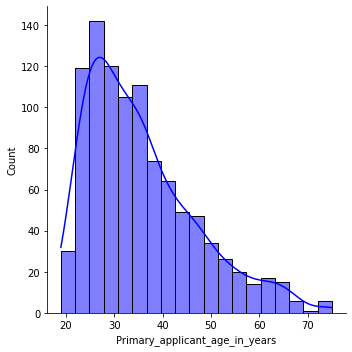

In [8]:
sns.displot(data['Primary_applicant_age_in_years'], kde = True, color = 'blue')

### First of all I want to know the age group of the applicants because if there are a lot of old people then risk of high credit score increases but that is not the case as shown in the below graph

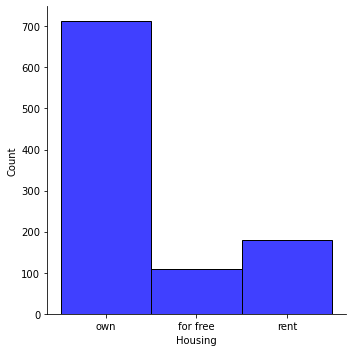

In [9]:
sns.displot(data['Housing'], kde = False, color = 'blue')

### It is more probable for people who own a house to be in the range of low credit risk but since the majority of people are owning its also not one of the major factor

#### The employement statues should be one of the major factors in predicting credit risk 
It is clearly seen that around 20% people are more probable to fall under high credit risk 

<AxesSubplot:ylabel='None'>

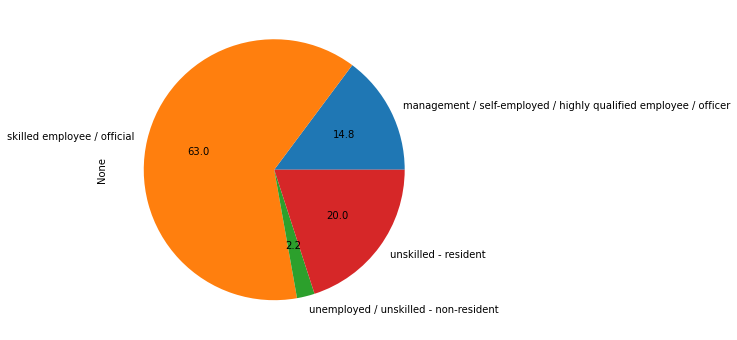

In [10]:
data.groupby('Employment_status').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

#### Not sure if gender would matter much in predicting credit risk but there are clearly more number of males than females who took loan so probability of male having high credit risk might increase

<AxesSubplot:ylabel='None'>

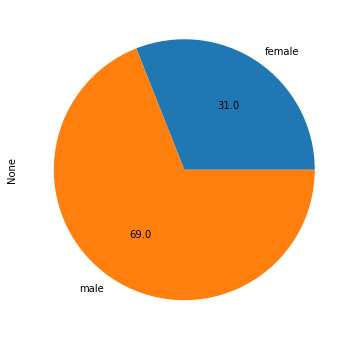

In [11]:
data.groupby('Gender').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

In [12]:
data['Foreign_worker'].sum()

963

So we have majority of foreign workers that too makes less effect on our prediction

<AxesSubplot:xlabel='Primary_applicant_age_in_years', ylabel='Employment_status'>

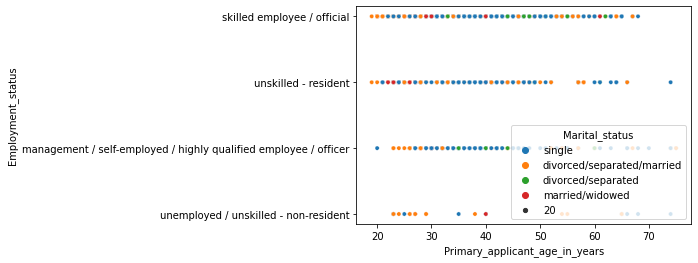

In [18]:
sns.scatterplot(x='Primary_applicant_age_in_years', y='Employment_status', data = data, hue='Marital_status',size = 20)

Above plot shows the realtion of age to that of employeement and marital status

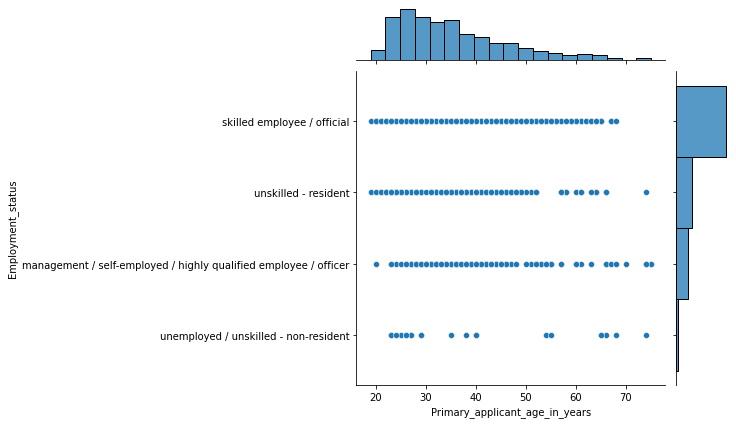

In [13]:
sns.jointplot(x='Primary_applicant_age_in_years',y='Employment_status',data=data, height = 6,kind = 'scatter')

### Jointplot shows us three maps in which the middle is the variance of age with respect to the employement status and the graphs on top and right are independent 

## <font color = 'green'>Let's check the loan dataset now</font>

In [21]:
df = pd.read_csv("loan.csv")

In [22]:
df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [23]:
df.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Other_EMI_plans                                814
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

### Numerical Value Analysis

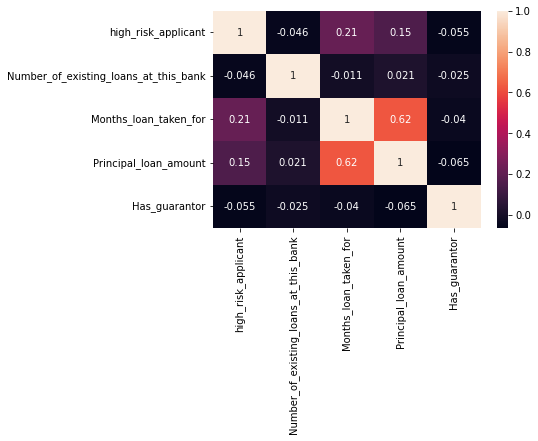

In [24]:
heatmap = sns.heatmap(df[["high_risk_applicant","Number_of_existing_loans_at_this_bank","Months_loan_taken_for","Principal_loan_amount","Has_guarantor"]].corr(), annot = True)

### Conclusion
According to the heatmap which shows correlation the months and principal amount is a major factor in predicting the credit risk of a person but it shows negative correlation for number of loans and guarantor, We know that if number of existing loans are less then the risk should be less and if there is a guarantor then the risk should also be less so lets see why is it giving negative correlation

In [25]:
df['Has_guarantor'].unique()

array([0, 1], dtype=int64)

In [26]:
df['Number_of_existing_loans_at_this_bank'].unique()

array([2, 1, 3, 4], dtype=int64)

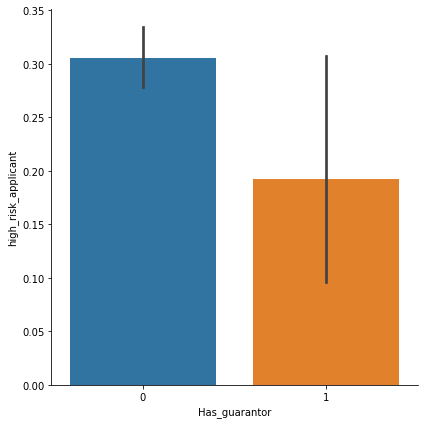

In [27]:
bargraph_guarantor = sns.factorplot(x = 'Has_guarantor', y = 'high_risk_applicant', data = df, kind = "bar", size = 6)
bargraph_guarantor = bargraph_guarantor.set_ylabels("high_risk_applicant")

### existing loans and guarantors 
So we know that having no guarantor is giving us high risk applicant hence it is an important factor for our model whereas number of existing loans does not affect the credit risk so we can neglect it to get a better result

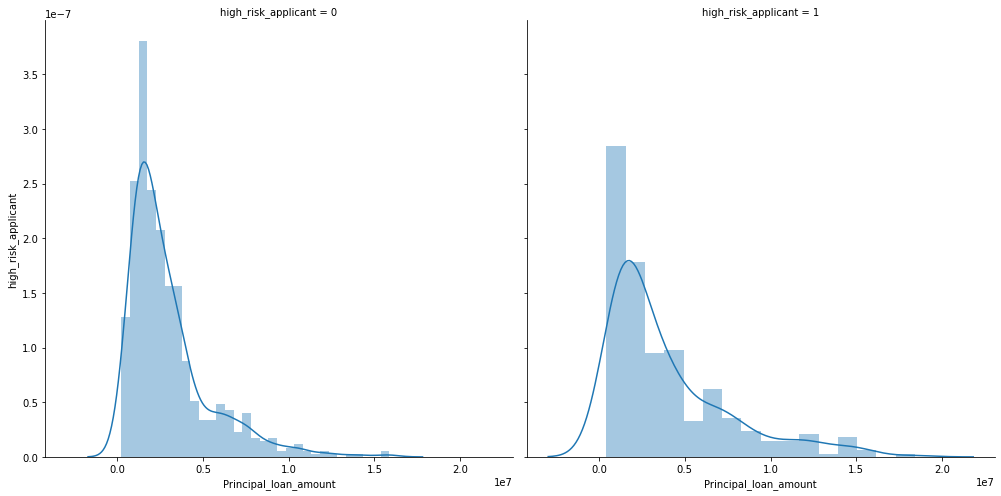

In [28]:
loan_amount_visual = sns.FacetGrid(df, col = 'high_risk_applicant', size=7)
loan_amount_visual = loan_amount_visual.map(sns.distplot,"Principal_loan_amount")
loan_amount_visual = loan_amount_visual.set_ylabels("high_risk_applicant")

### The above plot shows that there are more people in high risk of not returning the loan and the people with less amount of loan are under low risk applicants

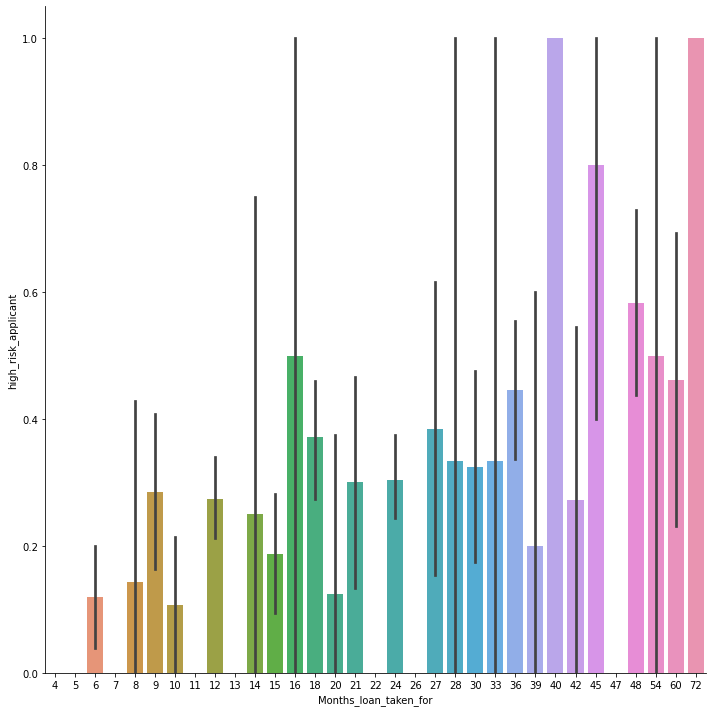

In [29]:
graph = sns.factorplot(x = 'Months_loan_taken_for', y = 'high_risk_applicant', data = df, kind = "bar", size = 10)
graph = graph.set_ylabels("high_risk_applicant")

As the time is increasing there is an increase in risk of returning so time also plays a valueable role in our prediction

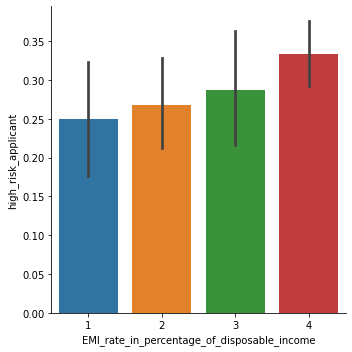

In [30]:
bargraph_EMI = sns.factorplot(x = 'EMI_rate_in_percentage_of_disposable_income', y = 'high_risk_applicant', data = df, kind = "bar", size = 5)
bargraph_EMI = bargraph_EMI.set_ylabels("high_risk_applicant")

<AxesSubplot:xlabel='Principal_loan_amount', ylabel='Months_loan_taken_for'>

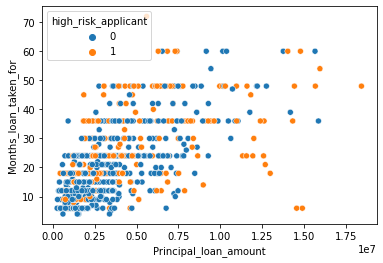

In [34]:
sns.scatterplot(x='Principal_loan_amount', y='Months_loan_taken_for', data=df, hue='high_risk_applicant')

The above plot clearly states that with increase in months loan taken for the probability of high risk applicant increases

### So as EMI rate of disposable is also a major factor in predicting the risk of returning the loan by our applicants

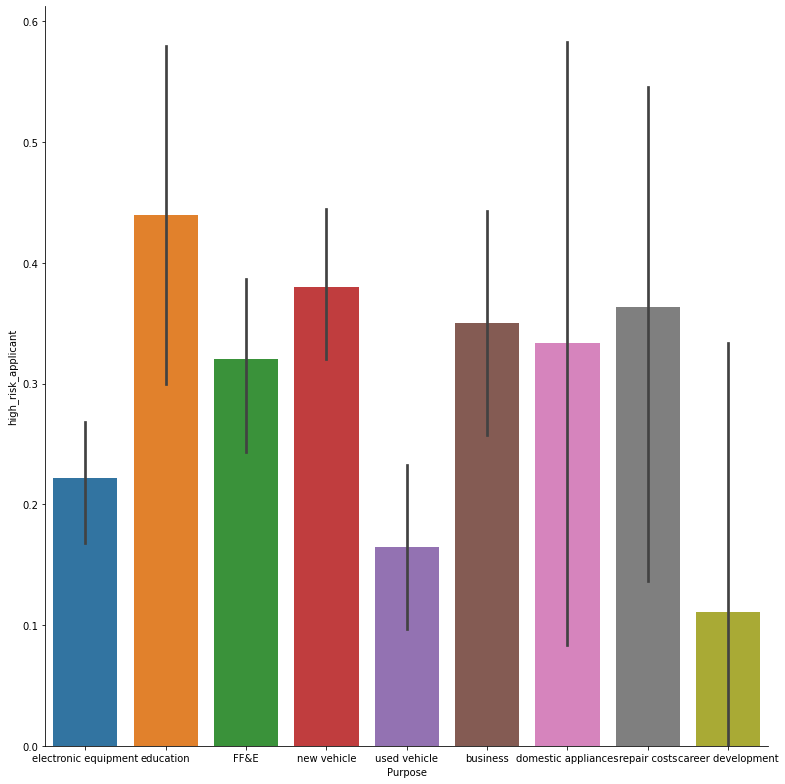

In [28]:
g = sns.factorplot(x = 'Purpose', y = 'high_risk_applicant', data = df, kind="bar",size = 11)
g = g.set_ylabels("high_risk_applicant")

In [148]:
df.corr()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
applicant_id,1.000000,0.009359,-0.056669,0.002269,-0.012961,0.011860,-0.038409,-0.029125
Months_loan_taken_for,0.009359,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,0.214927
Principal_loan_amount,-0.056669,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.154739
EMI_rate_in_percentage_of_disposable_income,0.002269,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.072404
Has_coapplicant,-0.012961,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,0.062728
Has_guarantor,0.011860,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.055039
Number_of_existing_loans_at_this_bank,-0.038409,-0.011284,0.020795,0.021669,-0.006001,-0.024682,1.000000,-0.045732
high_risk_applicant,-0.029125,0.214927,0.154739,0.072404,0.062728,-0.055039,-0.045732,1.000000


## The question asked in task 1

## Q1.Would a person with critical credit history be more creditworthy?

In [150]:
df_pr = df[df['Loan_history']=='critical/pending loans at other banks']
df_pr.groupby('high_risk_applicant').count()['Loan_history']

high_risk_applicant
0    243
1     50
Name: Loan_history, dtype: int64

So that person is more creditworthy asccording to the data as he falls under low risk applicant

## Would a person with more credit accounts be more creditworthy?

In [154]:
df.groupby('Number_of_existing_loans_at_this_bank').count()['high_risk_applicant']

Number_of_existing_loans_at_this_bank
1    633
2    333
3     28
4      6
Name: high_risk_applicant, dtype: int64

In [157]:
df_pr = df[df['high_risk_applicant']==0]
df_pr.groupby('Number_of_existing_loans_at_this_bank').count()['high_risk_applicant']

Number_of_existing_loans_at_this_bank
1    433
2    241
3     22
4      4
Name: high_risk_applicant, dtype: int64

In [158]:
df_pr = df[df['high_risk_applicant']==1]
df_pr.groupby('Number_of_existing_loans_at_this_bank').count()['high_risk_applicant']

Number_of_existing_loans_at_this_bank
1    200
2     92
3      6
4      2
Name: high_risk_applicant, dtype: int64

So people with more credit accounts have the same probability as of those with single accounts hence it does not matter 

## I have already marked my observations below every plot or chart that has been made
